In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['figure.dpi'] = 100
from mySecrets import DIAGRAM_DIR
oneDayInSeconds = 86400
oneYearInSeconds = oneDayInSeconds * 365

In [85]:
from analysisFunctions import importOrbitData,findDayAndYearI


data_RK4 = importOrbitData("sat_geo_no_pert_rk4_30_yr_10_min_100.txt")
data_euler = importOrbitData("sat_geo_no_pert_euler_30_yr_10_min_100.txt")

dayI,yearI = findDayAndYearI(data_RK4)


100%|██████████| 15768/15768 [00:00<00:00, 208424.44it/s]


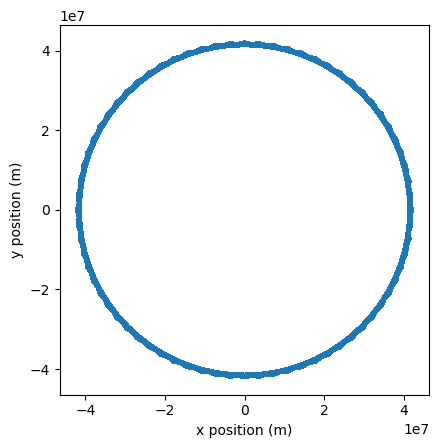

In [3]:
%matplotlib inline
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.plot(data_RK4["x"],data_RK4["y"])
plt.axis('scaled')
plt.savefig(DIAGRAM_DIR + "geo_x_vs_y.svg")

In [86]:
#calculate error of orbit from difference from geoorbit value
#this error estimate isn't working i think rn
correctR = 42238377.70930382

errorRK4Temp = []
errorRK4= []
errorRK4Yearly = []
errorEulerTemp = []
errorEuler= []
errorEulerYearly = []

for i in tqdm(range(len(data_RK4["t"]))):
    xi_rk4 = data_RK4["x"][i];
    yi_rk4 = data_RK4["y"][i];
    zi_rk4 = data_RK4["z"][i];
    r = np.sqrt(xi_rk4*xi_rk4 + yi_rk4*yi_rk4 + zi_rk4*zi_rk4)

    errori_rk4 = (abs(r-correctR)/correctR) * 100;
    errorRK4Temp.append(errori_rk4)
    errorRK4.append(errori_rk4)

    xi_euler = data_euler["x"][i];
    yi_euler = data_euler["y"][i];
    zi_euler = data_euler["z"][i];
    r = np.sqrt(xi_euler*xi_euler + yi_euler*yi_euler + zi_euler*zi_euler)

    errori_euler = (abs(r-correctR)/correctR) * 100;
    errorEulerTemp.append(errori_euler)
    errorEuler.append(errori_euler)

    if (i !=0 and i % yearI[1] == 0 ):
        errorRK4Yearly.append(sum(errorRK4Temp)/yearI[1])
        errorRK4Temp = []
        errorEulerYearly.append(sum(errorEulerTemp)/yearI[1])
        errorEulerTemp = []

years = list(range(1,len(errorRK4Yearly)+1))
yearT = [t/oneYearInSeconds for t in data_RK4["t"]]
dayT = [t/oneDayInSeconds for t in data_RK4["t"]]

100%|██████████| 15768/15768 [00:00<00:00, 224756.71it/s]


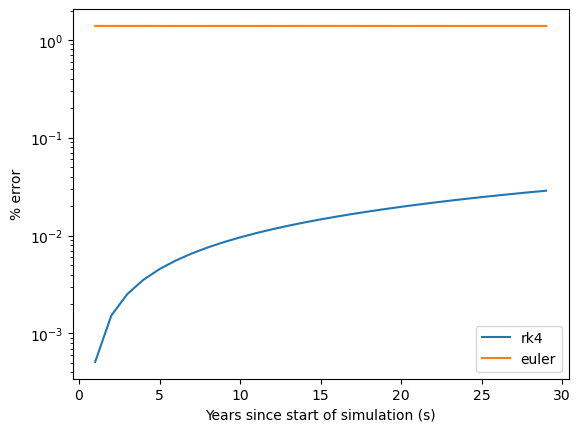

In [90]:
%matplotlib inline
plt.ylabel("% error")
plt.xlabel("Years since start of simulation (s)")
# plt.plot(data_rk4["t"], errorRK4)
# plt.plot(data_rk4["t"][a:b], errorRK4[a:b],label="rk4")
# plt.plot(data_rk4["t"][a:b], errorEuler[a:b],label="euler")
a = dayI[0]
b = dayI[20]
plt.plot(years, errorRK4Yearly,label="rk4")
plt.plot(years, errorEulerYearly,label="euler")
plt.yscale("log")
plt.legend()
# plt.savefig(DIAGRAM_DIR + "rk4_vs_euler_30_year.svg")

In [65]:
datas=[]
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_1_min_100.txt"), 1])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_2_min_100.txt"), 2])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_3_min_100.txt"), 3])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_4_min_100.txt"), 4])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_5_min_100.txt"), 5])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_6_min_100.txt"), 6])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_7_min_100.txt"), 7])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_8_min_100.txt"), 8])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_10_min_100.txt"), 10])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_15_min_100.txt"), 15])
datas.append([importOrbitData("sat_geo_no_pert_rk4_30_yr_20_min_100.txt"), 20])


100%|██████████| 7884/7884 [00:00<00:00, 209368.64it/s]


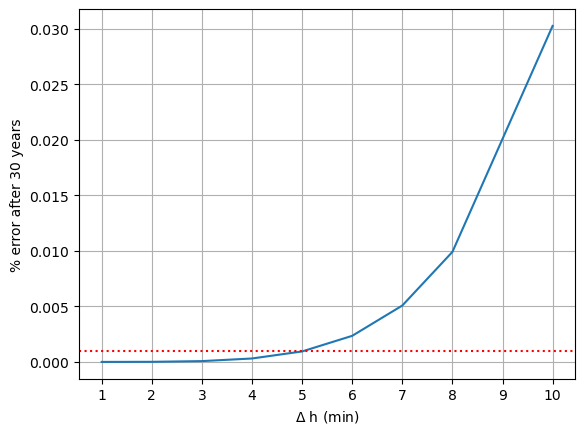

In [93]:
import math
plt.figure(0)
percentErrors = []
dts = []
for data in datas:
    x = data[0]["x"][-1]
    y = data[0]["y"][-1]
    z = data[0]["z"][-1]

    r = math.sqrt(x*x + y*y + z*z)

    percentErrors.append((abs(r-correctR)/correctR) * 100);
    dts.append(data[1]);


a = 0
b = 9
plt.xlabel("$\Delta$ h (min)")
plt.ylabel("% error after 30 years")
plt.plot(dts[a:b], percentErrors[a:b])
plt.axhline(y=0.001, linestyle="dotted", color="r")
# plt.yscale('log')
plt.xticks(range(1,11))
plt.grid()
plt.savefig(DIAGRAM_DIR + "rk4_error_vs_dt.svg")

Look at eccentricity and inclination of sat orbit

In [111]:
from analysisFunctions import calculateKeplerFromData

data_5_min = importOrbitData("sat_geo_no_pert_rk4_30_yr_5_min_100.txt");
kepler = calculateKeplerFromData(data_5_min)

100%|██████████| 31536/31536 [00:00<00:00, 201008.10it/s]
/Users/fraser/Github/masters_project/python/orbitFunctions.py:63: RuntimeWarning: invalid value encountered in double_scalars
  Omega = np.arccos(n[0] / nMag) * rad2Deg
/Users/fraser/Github/masters_project/python/orbitFunctions.py:70: RuntimeWarning: invalid value encountered in double_scalars
  omega = np.arccos(ne / (nMag * e)) * rad2Deg
/Users/fraser/Github/masters_project/python/orbitFunctions.py:77: RuntimeWarning: invalid value encountered in arccos
  trueAnomaly = np.arccos(er / (e * rMag)) * rad2Deg


In [120]:
from analysisFunctions import findMeanOverInterval

yearlyMeanE = findMeanOverInterval(kepler["e"],data_5_min["t"], oneYearInSeconds)

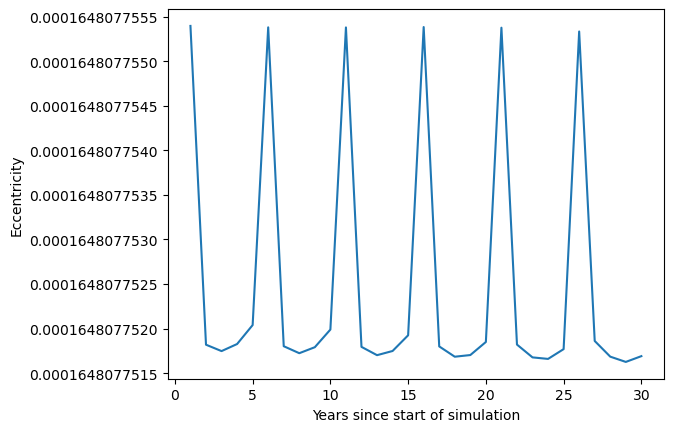

In [121]:
yearT_5_min = [t/oneYearInSeconds for t in data_5_min["t"]]
plt.rcParams["axes.formatter.useoffset"]=False
plt.xlabel("Years since start of simulation")
plt.ylabel("Eccentricity")
n = 1
plt.plot(range(1,31),yearlyMeanE);
plt.savefig(DIAGRAM_DIR + "geo_e_vs_year.svg")

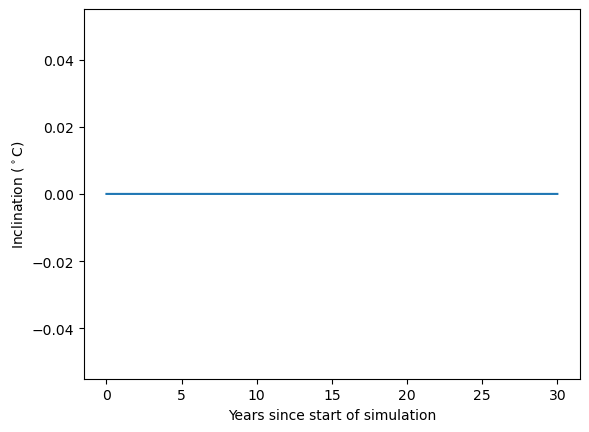

In [100]:
plt.xlabel("Years since start of simulation")
plt.ylabel("Inclination ($^\circ$C)")
plt.plot(yearT,kepler["i"]);
plt.savefig(DIAGRAM_DIR + "geo_inclination_vs_year.svg")

In [114]:
from analysisFunctions import importOrbitData, calculateKeplerFromData, findDayAndYearI

data_1_yr= importOrbitData("sat_geo_no_pert_1_yr_5_min_1.txt")

kepler_1_yr = calculateKeplerFromData(data_1_yr)

dayT_1_yr=[t/oneDayInSeconds for t in data_1_yr["t"]]

dayI_1_yr, yearI_1_yr = findDayAndYearI(data_1_yr)

100%|██████████| 105120/105120 [00:00<00:00, 200981.16it/s]


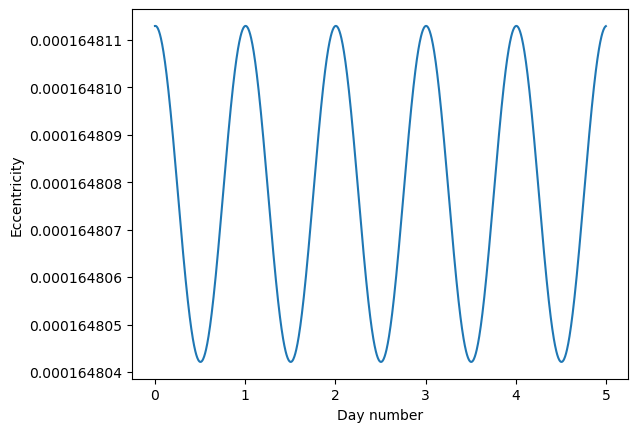

In [119]:
plt.xlabel("Day number")
plt.ylabel("Eccentricity")
a = dayI_1_yr[0]
b = dayI_1_yr[5]
plt.plot(dayT_1_yr[a:b],kepler_1_yr["e"][a:b]);
plt.savefig(DIAGRAM_DIR + "geo_e_vs_t_over_5_day.svg")